# **Anomaly Detection with Autoencoder**

In this code, we are implementing a convolutional Autoencoder and Variatioal Autoencoder (VAE) using TensorFlow and Keras.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape,  Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import zipfile
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, backend as K

from tensorflow.keras.layers import Dropout



# Dataset Loading and Labeling for Anomaly Detection



In [2]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)  # Convert DataFrame to NumPy array

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal = np.concatenate(normal_data, axis=0)
add_weight = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant = np.concatenate(PressureGain_constant_data, axis=0)


In [3]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(25):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(25):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(25):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(25):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(25):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal_test = np.concatenate(normal_data, axis=0)
add_weight_test = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight_test = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad_test = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant_test = np.concatenate(PressureGain_constant_data, axis=0)


In [4]:
sample_len = 20  # Length of each sample

# Function to split raw data into samples of fixed length
def split_into_samples(data, sample_len=20):
    num_features = data.shape[1]
    num_samples = data.shape[0] // sample_len
    trimmed_data = data[:num_samples * sample_len]
    return trimmed_data.reshape(num_samples, sample_len, num_features)

# Split training data per class
normal_split = split_into_samples(normal, sample_len)
add_weight_split = split_into_samples(add_weight, sample_len)
slight_split = split_into_samples(PropellerDamage_slight, sample_len)
bad_split = split_into_samples(PropellerDamage_bad, sample_len)
pressure_split = split_into_samples(PressureGain_constant, sample_len)

# Split testing data per class (using *_test arrays)
normal_split_test = split_into_samples(normal_test, sample_len)
add_weight_split_test = split_into_samples(add_weight_test, sample_len)
slight_split_test = split_into_samples(PropellerDamage_slight_test, sample_len)
bad_split_test = split_into_samples(PropellerDamage_bad_test, sample_len)
pressure_split_test = split_into_samples(PressureGain_constant_test, sample_len)

# Show shapes of training sets
print("normal_split:", normal_split.shape)
print("add_weight_split:", add_weight_split.shape)
print("PropellerDamage_slight_split:", slight_split.shape)
print("PropellerDamage_bad_split:", bad_split.shape)
print("PressureGain_constant_split:", pressure_split.shape)

# Show shapes of test sets
print("normal_split_test:", normal_split_test.shape)
print("add_weight_split_test:", add_weight_split_test.shape)
print("PropellerDamage_slight_split_test:", slight_split_test.shape)
print("PropellerDamage_bad_split_test:", bad_split_test.shape)
print("PressureGain_constant_split_test:", pressure_split_test.shape)


normal_split: (504, 20, 17)
add_weight_split: (490, 20, 17)
PropellerDamage_slight_split: (490, 20, 17)
PropellerDamage_bad_split: (489, 20, 17)
PressureGain_constant_split: (490, 20, 17)
normal_split_test: (254, 20, 17)
add_weight_split_test: (244, 20, 17)
PropellerDamage_slight_split_test: (245, 20, 17)
PropellerDamage_bad_split_test: (245, 20, 17)
PressureGain_constant_split_test: (245, 20, 17)


In [5]:
# Merge  data from all classes into a single dataset
X_train = np.concatenate((normal_split, add_weight_split, slight_split, bad_split, pressure_split))

# Create corresponding labels for each class
labels_normal = np.zeros(normal.shape[0])
labels_add = np.ones(add_weight.shape[0])
labels_slight = np.full(PropellerDamage_slight.shape[0], 2)
labels_bad = np.full(PropellerDamage_bad.shape[0], 3)
labels_pressure = np.full(PressureGain_constant.shape[0], 4)

# Concatenate all label arrays into a single label vector
labels = np.concatenate([
    labels_normal,
    labels_add,
    labels_slight,
    labels_bad,
    labels_pressure
])

# Print the shapes of the final dataset and label array
print("shape of fft_data:", X_train.shape)
print("shape of labels:", labels.shape)


shape of fft_data: (2463, 20, 17)
shape of labels: (49302,)


In [6]:
X_test_normal = normal_split_test.reshape(-1, normal_split_test.shape[-1])  # شکل (نمونه‌ها, 17)


In [7]:
testx = np.concatenate((normal_test, add_weight_test, PropellerDamage_slight_test, PropellerDamage_bad_test, PressureGain_constant_test))
labels_normal = np.zeros(normal_test.shape[0])
labels_add = np.ones(add_weight_test.shape[0])
labels_slight = np.full(PropellerDamage_slight_test.shape[0], 2)
labels_bad = np.full(PropellerDamage_bad_test.shape[0], 3)
labels_pressure = np.full(PressureGain_constant_test.shape[0], 4)
y_test_labels = np.concatenate([
    labels_normal,
    labels_add,
    labels_slight,
    labels_bad,
    labels_pressure
])

In [8]:
X_train_normal = normal_split.reshape(-1, normal_split.shape[-1])  # shape: (samples, 17)

X_train = X_train.reshape(-1, normal_split.shape[-1])

# Standardize the datasets using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_normal_scaled = scaler.transform(X_train_normal)

X_test_scaled = scaler.transform(testx)
X_test_normal_scaled = scaler.transform(X_test_normal)


# **Part 1: MLP Autoencoder for Anomaly Detection and Evaluation**



In [9]:
# Model parameters
input_dim = X_train_normal_scaled.shape[1]  # 17 features

# Improved autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(512, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Dense(128, activation='relu')(encoded)

decoded = Dense(256, activation='relu')(encoded)
decoded = Dropout(0.2)(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dropout(0.2)(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
autoencoder.fit(
    X_train_normal_scaled,
    X_train_normal_scaled,
    epochs=500,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4369 - val_loss: 0.0707
Epoch 2/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1221 - val_loss: 0.0557
Epoch 3/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1095 - val_loss: 0.0494
Epoch 4/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1015 - val_loss: 0.0609
Epoch 5/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0878 - val_loss: 0.0627
Epoch 6/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0877 - val_loss: 0.0446
Epoch 7/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0832 - val_loss: 0.0530
Epoch 8/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0785 - val_loss: 0.0449
Epoch 9/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0747 - val_loss: 0.0539
Epoch 10/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0768 - val_loss: 0.0516
Epoch 11/500
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0766 - val_loss: 0.0459
Epoch 12/500
252/252 ━━━━━━━━━━━━━━━━━━━━

# Training and Evaluating Convolutional Autoencoder for Anomaly Detection



In [10]:
# Compute reconstruction error for normal data
decoded_normal = autoencoder.predict(X_test_normal_scaled)
mse_normal = np.mean(np.square(X_test_normal_scaled - decoded_normal), axis=1)

# Set anomaly detection threshold using standard deviation
threshold = np.mean(mse_normal) + 2 * np.std(mse_normal)

# Compute reconstruction error for test data
decoded_test = autoencoder.predict(X_test_scaled)
mse_test = np.mean(np.square(X_test_scaled - decoded_test), axis=1)

# Anomaly detection
y_pred = (mse_test > threshold).astype(int)

# Convert test labels to binary (0 = normal, 1 = anomaly)
y_test_binary = np.where(y_test_labels == 0, 0, 1)

# Calculate performance metrics
conf_matrix = confusion_matrix(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
 [[ 4974   110]
 [ 3972 15637]]
Precision: 0.99
Recall: 0.80


# Visualizing Instances for Confusion Matrix Analysis



772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


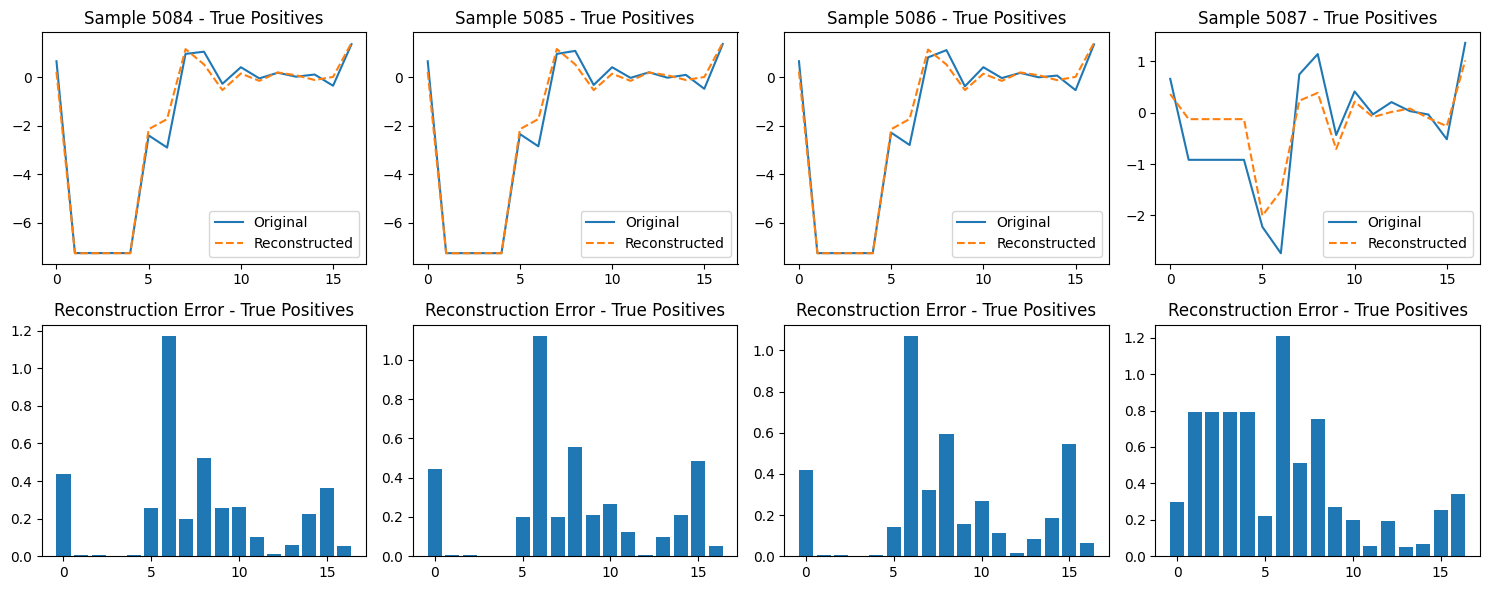

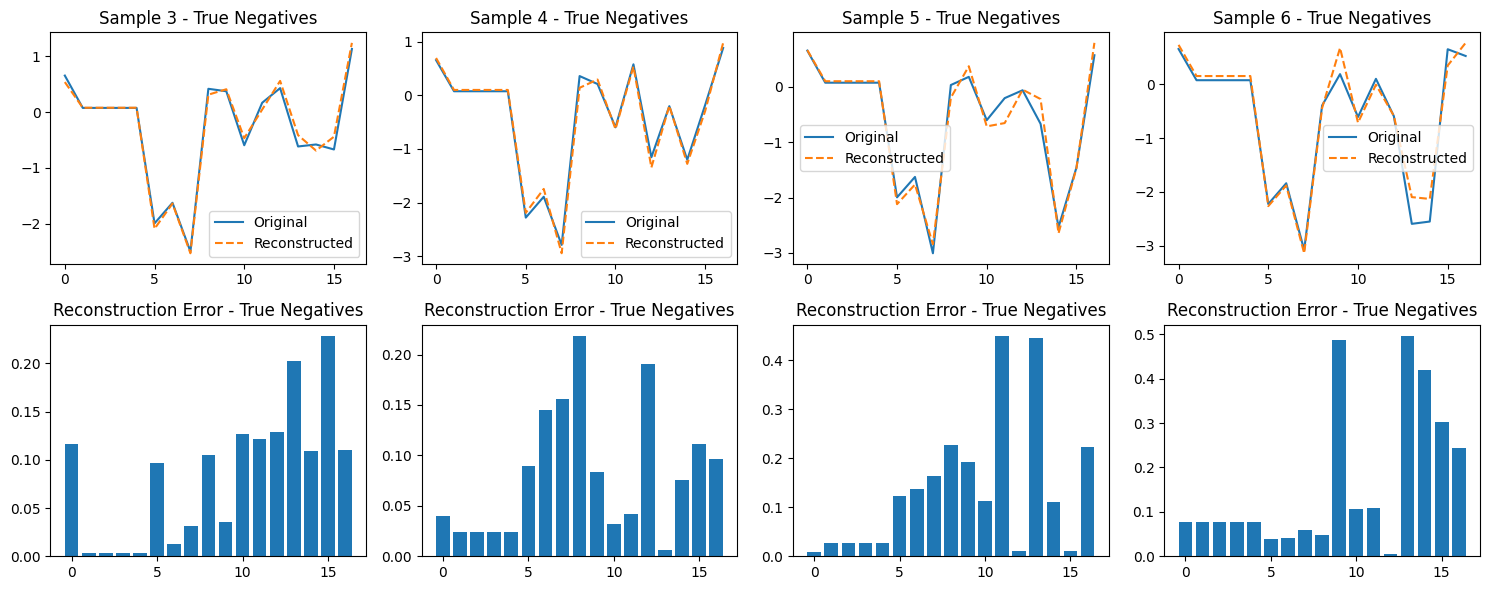

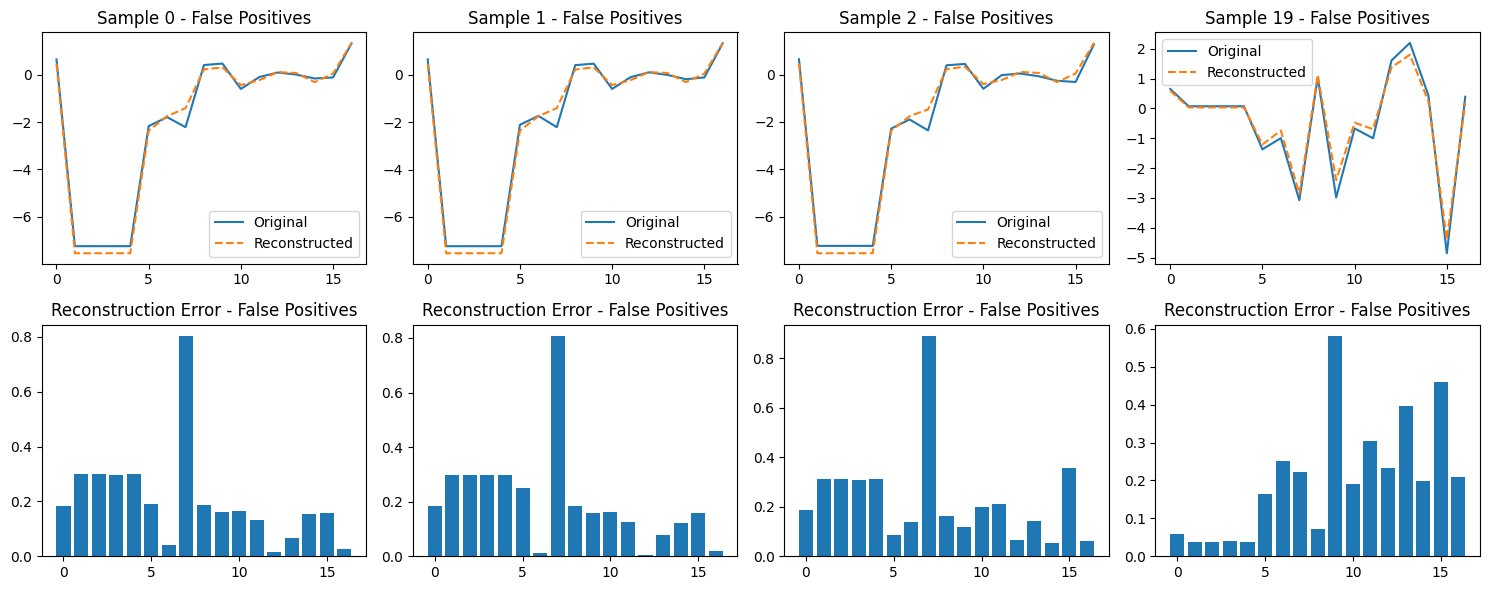

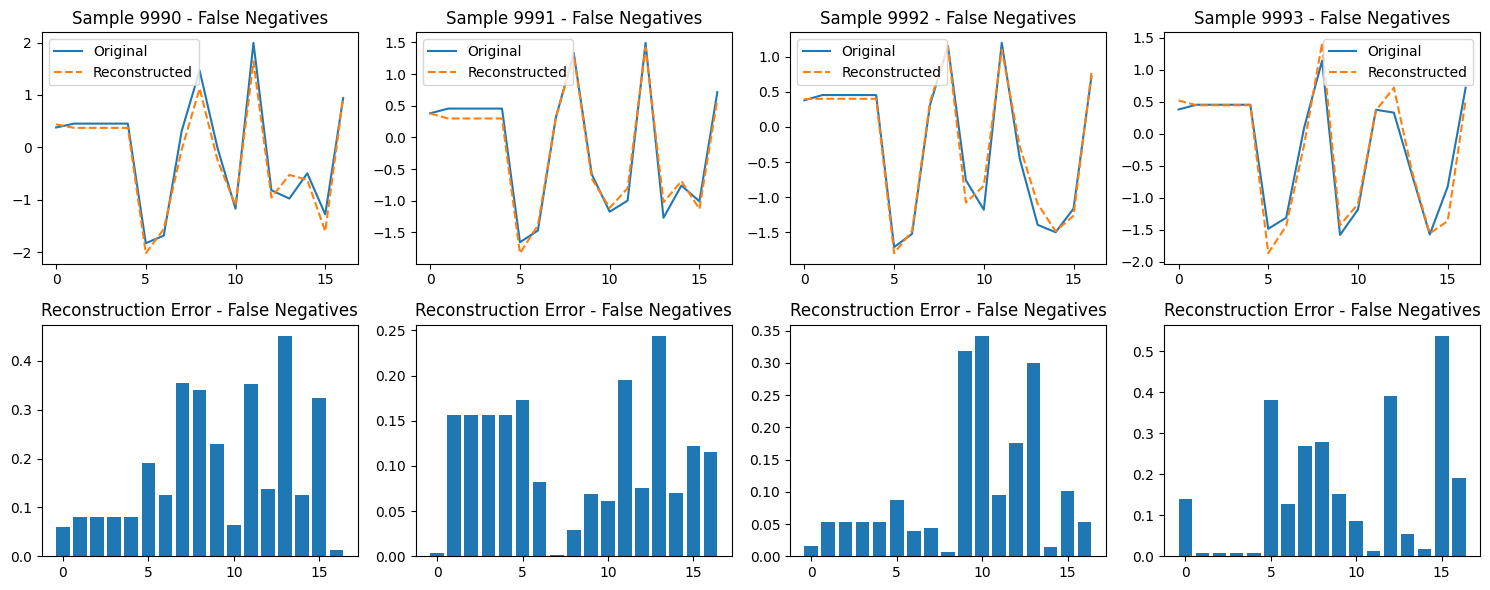

In [11]:
def visualize_confusion_matrix_instances(original, reconstructed, indices, title):
    n = min(len(indices), 4)
    plt.figure(figsize=(15, 6))
    
    for i in range(n):
        idx = indices[i]
        
        # Plot original data
        plt.subplot(2, n, i + 1)
        plt.plot(original[idx], label='Original')
        plt.plot(reconstructed[idx], label='Reconstructed', linestyle='--')
        plt.title(f'Sample {idx} - {title}')
        plt.legend()
        
        # Plot reconstruction error
        plt.subplot(2, n, i + 1 + n)
        error = np.abs(original[idx] - reconstructed[idx])
        plt.bar(range(len(error)), error)
        plt.title(f'Reconstruction Error - {title}')
    
    plt.tight_layout()
    plt.show()

tp_indices = np.where((y_test_binary == 1) & (y_pred == 1))[0]  # True Positives
tn_indices = np.where((y_test_binary == 0) & (y_pred == 0))[0]  # True Negatives
fp_indices = np.where((y_test_binary == 0) & (y_pred == 1))[0]  # False Positives
fn_indices = np.where((y_test_binary == 1) & (y_pred == 0))[0]  # False Negatives

# Compute reconstructed data
decoded_data = autoencoder.predict(X_test_scaled)

# Visualize different types of prediction outcomes
visualize_confusion_matrix_instances(X_test_scaled, decoded_data, tp_indices, title='True Positives')
visualize_confusion_matrix_instances(X_test_scaled, decoded_data, tn_indices, title='True Negatives')
visualize_confusion_matrix_instances(X_test_scaled, decoded_data, fp_indices, title='False Positives')
visualize_confusion_matrix_instances(X_test_scaled, decoded_data, fn_indices, title='False Negatives')


# **Part 2: Variational Autoencoder (VAE) for Anomaly Detection and Evaluation**




In [12]:
# Parameters
input_dim = 17
latent_dim = 8

# Sampling function for the reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    epsilon = tf.random.normal(shape=(batch, latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Encoder architecture
encoder_inputs = Input(shape=(input_dim,), name="encoder_input")
x = Dense(64, activation="relu")(encoder_inputs)
x = Dense(32, activation="relu")(x)
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)
z = Lambda(sampling, name="z")([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Decoder architecture
decoder_inputs = Input(shape=(latent_dim,))
x = Dense(32, activation="relu")(decoder_inputs)
decoder_outputs = Dense(input_dim, activation="linear")(x)
decoder = Model(decoder_inputs, decoder_outputs, name="decoder")

# Custom VAE model
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(tf.keras.losses.mse(data, reconstruction)) * input_dim
            kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + 0.1 * kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss
        }

# Instantiate and compile the VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer="adam", loss="mse")


# VAE Training and Anomaly Detection


In [13]:
# Training
vae.fit(X_train_normal_scaled, epochs=500, batch_size=32, shuffle=True, validation_data=(X_train_normal_scaled, X_train_normal_scaled))


Epoch 1/500
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - kl_loss: 1.9124 - loss: 11.4350 - reconstruction_loss: 11.2438 - val_loss: 0.2909
Epoch 2/500
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 4.7882 - loss: 3.8470 - reconstruction_loss: 3.3682 - val_loss: 0.1347
Epoch 3/500
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 4.5538 - loss: 2.4856 - reconstruction_loss: 2.0302 - val_loss: 0.1098
Epoch 4/500
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - kl_loss: 4.0936 - loss: 2.1657 - reconstruction_loss: 1.7564 - val_loss: 0.0985
Epoch 5/500
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - kl_loss: 3.8525 - loss: 2.0128 - reconstruction_loss: 1.6276 - val_loss: 0.0924
Epoch 6/500
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - kl_loss: 3.6764 - loss: 1.9116 - reconstruction_loss: 1.5439 - val_loss: 0.0876
Epoch 7/500
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - kl_loss: 3.5736 - loss: 1.8367 - reconstruction_loss: 1.4794 - val_loss: 0.0864
Epoch 8/500
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

In [14]:
# Convert y_test to binary: 0 = normal, 1 = anomaly
# Assumption: normal class label is 0
y_test_binary = (y_test_labels != 0).astype(int)

# Reconstruct normal test samples
decoded = vae.predict(X_test_normal_scaled)
mse_VAE = np.mean(np.square(X_test_normal_scaled - decoded), axis=1)
threshold_VAE = np.mean(mse_VAE) + 5 * np.std(mse_VAE)

# Reconstruct all test samples and compute reconstruction error
decoded = vae.predict(X_test_scaled)
mse_pred_VAE = np.mean(np.square(X_test_scaled - decoded), axis=1)
y_pred_VAE = (mse_pred_VAE > threshold_VAE).astype(int)

# Evaluate performance
conf_matrix = confusion_matrix(y_test_binary, y_pred_VAE)
precision = precision_score(y_test_binary, y_pred_VAE, average='binary')
recall = recall_score(y_test_binary, y_pred_VAE, average='binary')

print("Confusion Matrix:\n", conf_matrix)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix:
 [[ 4974   110]
 [ 3972 15637]]
Precision: 0.99
Recall: 0.80


772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


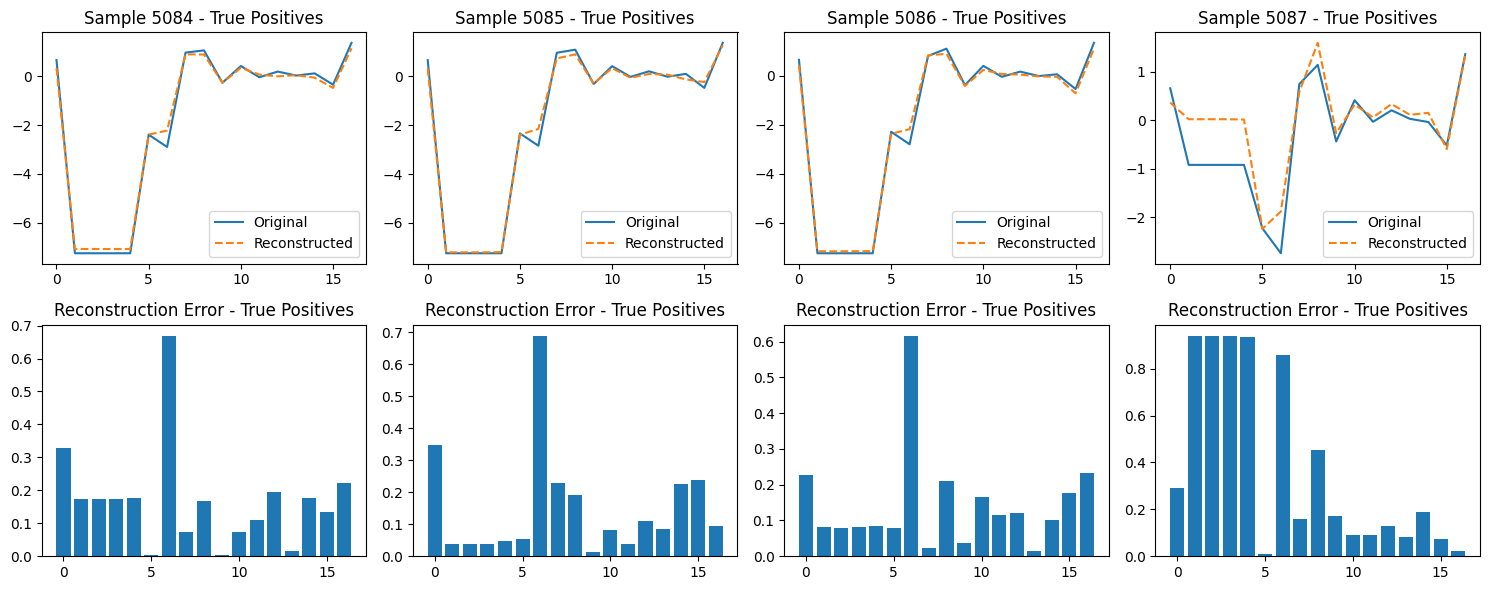

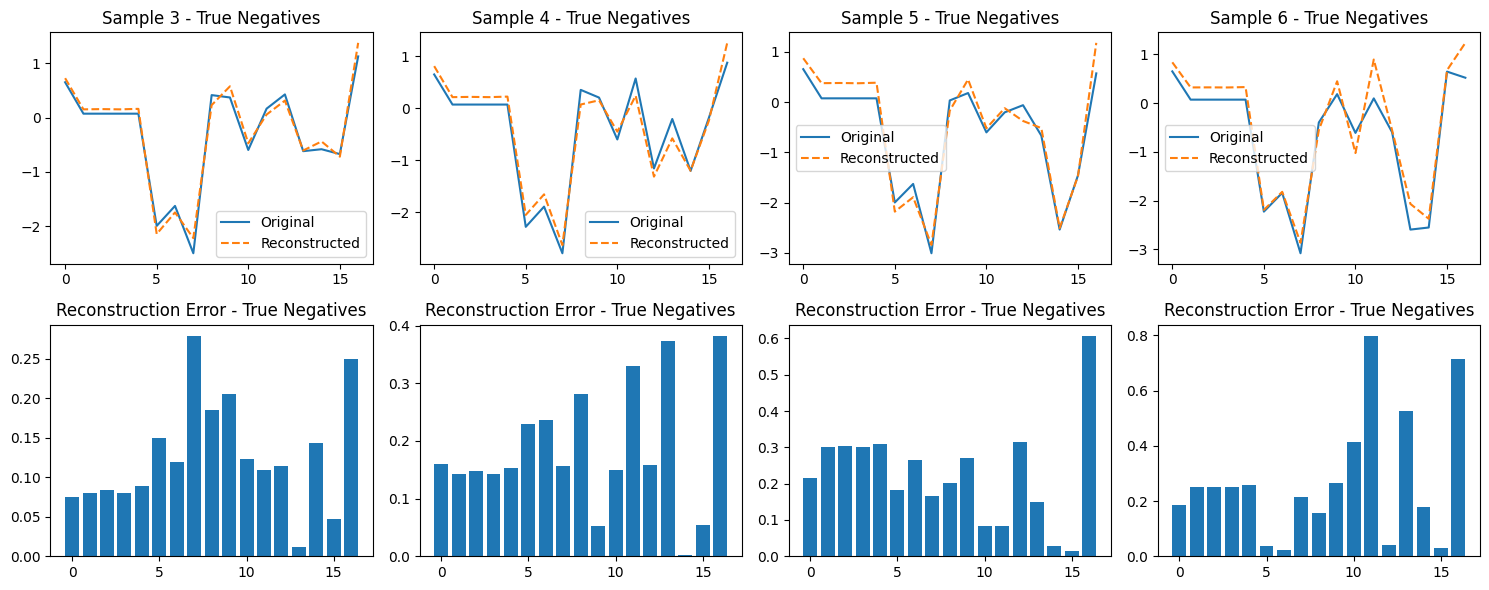

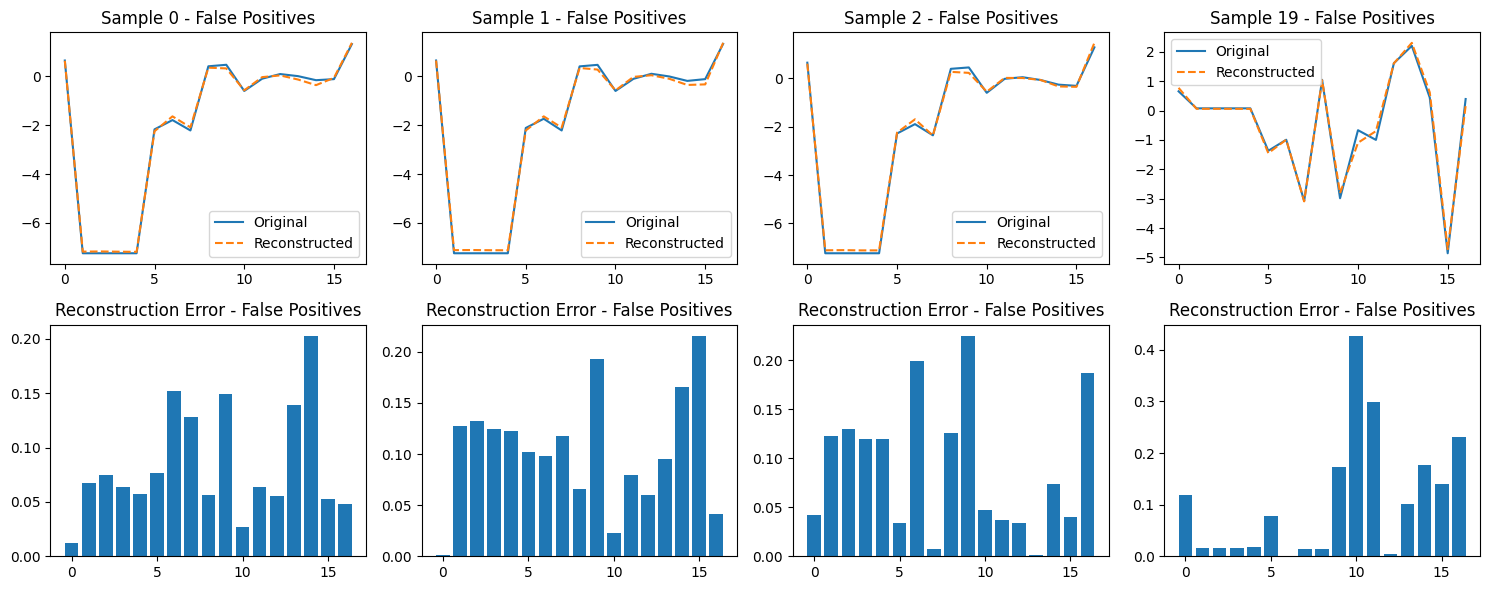

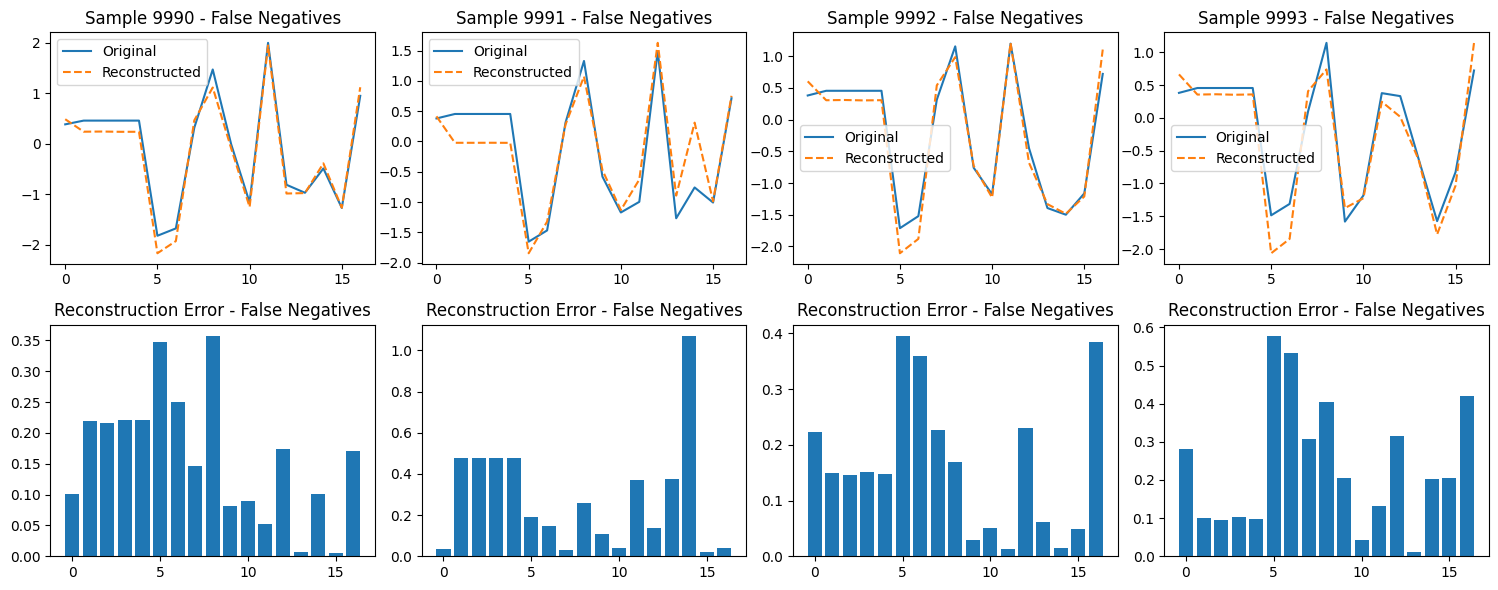

In [15]:
def visualize_confusion_matrix_instances(original, reconstructed, indices, title):
    n = min(len(indices), 4)
    plt.figure(figsize=(15, 6))
    
    for i in range(n):
        idx = indices[i]
        
        # Plot original and reconstructed data
        plt.subplot(2, n, i + 1)
        plt.plot(original[idx], label='Original')
        plt.plot(reconstructed[idx], label='Reconstructed', linestyle='--')
        plt.title(f'Sample {idx} - {title}')
        plt.legend()
        
        # Plot reconstruction error
        plt.subplot(2, n, i + 1 + n)
        error = np.abs(original[idx] - reconstructed[idx])
        plt.bar(range(len(error)), error)
        plt.title(f'Reconstruction Error - {title}')
    
    plt.tight_layout()
    plt.show()

tp_indices = np.where((y_test_binary == 1) & (y_pred_VAE == 1))[0]
tn_indices = np.where((y_test_binary == 0) & (y_pred_VAE == 0))[0]
fp_indices = np.where((y_test_binary == 0) & (y_pred_VAE == 1))[0]
fn_indices = np.where((y_test_binary == 1) & (y_pred_VAE == 0))[0]

decoded_data = vae.predict(X_test_scaled)

visualize_confusion_matrix_instances(X_test_scaled, decoded_data, tp_indices, title='True Positives')
visualize_confusion_matrix_instances(X_test_scaled, decoded_data, tn_indices, title='True Negatives')
visualize_confusion_matrix_instances(X_test_scaled, decoded_data, fp_indices, title='False Positives')
visualize_confusion_matrix_instances(X_test_scaled, decoded_data, fn_indices, title='False Negatives')
